# Ecuaciones diferenciales ordinarias

Las ecuaciones diferenciales son parte fundamental de la física. Muchas leyes físicas como la segunda ley de Newton o las ecuaciones de Maxwell se expresan de esta manera, por lo que aprender resolverlas es de suma importancia. En esta sesión aprenderemos algunos métodos simbólicos y numéricos que ofrecen ciertos paquetes en Python para poder obtener la solución a ecuaciones diferenciales ordinarias. Primero veremos como resolverlas de manera simbólica usando el paquete $\texttt{sympy}$.

## **Decaimiento radioactivo**

Los núcleos radioactivos decaen de acuerdo a la ley

$$
\frac{dN}{dt} = - \lambda N
$$

donde $N$ es la concentración de los nucleidos en el tiempo $t$. 

La solución a esta ecuación es una exponencial que decae. Si en $t = 0$ se tiene una concentración inicial $N(0) = N_0$ 

$$
N = N_0 e^{-\lambda t}.
$$

In [2]:
import sympy as sp #Para hacer cálculo simbólico
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline #Para que las imágenes salgan en Jupyter ¿?

In [5]:
#Variables

#Cantidades simbólicas
t = sp.symbols('t') 
#Función, Function('N': nombre)(t: variable)
N = sp.Function('N')(t) 
l = sp.symbols('lambda') 

### Sin condiciones iniciales

In [7]:
""" Eq: igualdad(equality), 
    Eq(sp.diff(N): primera parte, -l*N: segunda parte) 
    diff(N): primera derivada """
eq = sp.Eq(sp.diff(N),  -l*N) 
eq

Eq(Derivative(N(t), t), -lambda*N(t))

**Resolver la ecuación**

In [4]:
# dsolve(eq: ecuación a resolver, N: solución)
sol = sp.dsolve(eq, N)
sol

Eq(N(t), C1*exp(-lambda*t))

### Con condiciones iniciales


In [9]:
N_0 = sp.symbols('N_0')
""" ics = {N.subs(t, 0): N_0}: condiciones iniciales
    N.subs(t, 0): el 't' lo va a cambiar por '0' en la función 'N'""" 
sol_ci = sp.dsolve(sp.diff(N) + l*N, N, ics = {N.subs(t, 0): N_0})
sol_ci

Eq(N(t), N_0*exp(-lambda*t))

**Hacemos que N sea una funcion numerica para graficarla**

In [12]:
#Asignación de valores 
l_num = 0.1
N0_num = 1.0e10

#Pasar de simbólico a numérico
""" lambdify(t: variable independiente,
             sol_ci.subs([(l, l_num),(N_0, N0_num)]).rhs:
                    sol_ci: solución,
                    subs: cambiar símbolos por números,
                    rhs: 'extraer' la función solución,
             'numpy': paquete al que lo voy a pasar ¿?)
    lambdify: pasa de sp.exp(-lambda*t) a np.exp(-lambda*t) """
N_num = sp.lambdify(t, sol_ci.subs([(l, l_num), (N_0, N0_num)]).rhs, 'numpy')

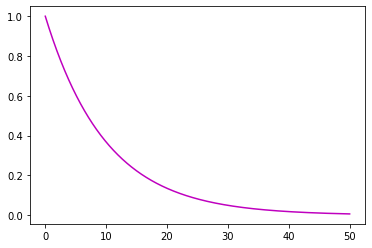

In [11]:
t_plot = np.linspace(0, 50, 1000)
N_plot = N_num(t_plot)/N0_num

plt.plot(t_plot, N_plot,color='m')

## **Oscilador armónico**

## Oscilador armónico simple

Una de los sistemas más importantes de la física, si es que no es el más importante, es el oscilador armónico cuya realización más simple es una partícula en un resorte. De la segunda ley de Newton y la ley de Hooke, la ecuación de movimiento que describe el oscilador armónico está dada por

$$
\frac{d^2 x}{dt^2} + \omega^2 x = 0 
$$

donde $x$ es la posición de la partícula y $\omega$ es su frecuencia. La solución general a esta ecuación está dada por

$$
x(t) = C_1 \cos(\omega t) + C_2 \sin(\omega t) = A\cos(\omega t + \phi)
$$

donde $C_1$ y $C_2$, u $\omega$ y $\phi$ dependen de las condiciones iniciales $x(0) = x_0$ y $\dot{x} (0) = \dot{x}_0$ 

In [15]:
x_simple = sp.Function('x')(t)
w = sp.symbols('omega')

# diff(x_simple, (t, 2)): Segunda derivada
eq_simple = sp.Eq(sp.diff(x_simple, (t, 2)) + w**2*x_simple,  0)
sol_simple = sp.dsolve(eq_simple, x_simple)
sol_simple

Eq(x(t), C1*exp(-I*omega*t) + C2*exp(I*omega*t))

In [16]:
x0 = sp.symbols('x_0')
x0dot = sp.symbols('\dot{x_0}')

#Se asigna condiciones iniciales a x(0) y \dot(x)(0)
sol_simple_ci = sp.dsolve(eq_simple, x_simple, ics = {x_simple.subs(t, 0): x0, sp.diff(x_simple, t).subs(t, 0): x0dot})
sol_simple_ci 

Eq(x(t), (-I*\dot{x_0}/(2*omega) + x_0/2)*exp(I*omega*t) + (I*\dot{x_0} + omega*x_0)*exp(-I*omega*t)/(2*omega))

**Pasar de expresiones complejas a senos y cosenos**

In [18]:
""" rewrite(sp.cos): representa una función matemática en términos de otra función
    simplify(): para simplificar """
sol_simple_ci = sol_simple_ci.rewrite(sp.cos).simplify()
sol_simple_ci

Eq(x(t), \dot{x_0}*sin(omega*t)/omega + x_0*cos(omega*t))

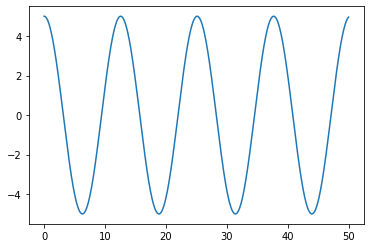

In [23]:
w_num = 0.5
x0_num = 5
x0dot_num = 0

x_simple_num = sp.lambdify(t, sol_simple_ci.subs([(w, w_num), (x0, x0_num), (x0dot, x0dot_num)]).rhs, 'numpy')

x_simple_plot = x_simple_num(t_plot)

plt.plot(t_plot, x_simple_plot)
plt.show()

## Oscilador armónico amortiguado

Consideremos el caso en el que además se tiene una fuerza de resistencia proporcional a la velocidad de la partícula. La ecuación de movimiento será ahora

$$
\frac{d^2 x}{dt^2} + \gamma \dot{x}+ \omega^2 x = 0 
$$

cuya solución depende de los valores de $\gamma$ y $\omega$.

In [25]:
g = sp.symbols('gamma')

x_damped = sp.Function('x')(t)

eq_damped = sp.Eq(sp.diff(x_damped, (t, 2)) + g*sp.diff(x_damped, t) + w**2*x_damped,  0)
eq_damped

Eq(gamma*Derivative(x(t), t) + omega**2*x(t) + Derivative(x(t), (t, 2)), 0)

### Sobreamortiguado

In [30]:
#sobreamortiguado
g_sobre = 1.1*2*w 
CI = {x_simple.subs(t, 0): x0, sp.diff(x_damped, t).subs(t, 0): x0dot}

eq_damped_sobre = eq_damped.subs(g, g_sobre)
sol_sobre = sp.dsolve(eq_damped_sobre, x_simple) #ics = CI

sol_sobre

Eq(x(t), C1*exp(-1.55825756949558*omega*t) + C2*exp(-0.641742430504416*omega*t))

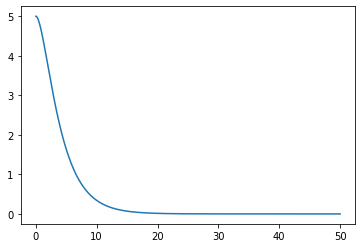

In [28]:
sol_sobre = sp.dsolve(eq_damped_sobre, x_simple, ics = {x_simple.subs(t, 0): x0, sp.diff(x_simple, t).subs(t, 0): x0dot})

x_sobre_num = sp.lambdify(t, sol_sobre.subs([(w, w_num), (x0, x0_num), (x0dot, x0dot_num)]).rhs, 'numpy')

x_sobre_plot = x_sobre_num(t_plot)
plt.plot(t_plot, x_sobre_plot)

### Amortiguamiento crítico

In [31]:
#amortiguamiento critico
g_crit = 2*w

eq_damped_crit = eq_damped.subs(g, g_crit)
sol_crit = sp.dsolve(eq_damped_crit, x_simple, ics = CI)
sol_crit

Eq(x(t), (t*(\dot{x_0} + omega*x_0) + x_0)*exp(-omega*t))

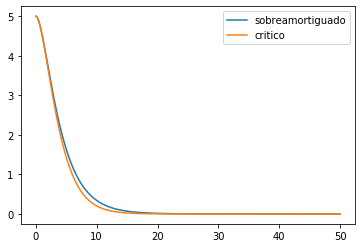

In [55]:
x_crit_num = sp.lambdify(t, sol_crit.subs([(w, w_num), (x0, x0_num), (x0dot, x0dot_num)]).rhs, 'numpy')

x_crit_plot = x_crit_num(t_plot)
plt.plot(t_plot, x_sobre_plot, t_plot, x_crit_plot)
plt.legend(['sobreamortiguado', 'critico'])

### Subamortiguamiento

In [52]:
g_sub = 0.1*2*w

eq_sub = eq_damped.subs(g, g_sub)
sol_sub = sp.dsolve(eq_sub, x_simple,ics = CI) #ics = CI
sol_sub

Eq(x(t), (0.502518907629606*I*\dot{x_0}/omega + 0.5*x_0 + 0.0502518907629606*I*x_0)*exp(omega*t*(-0.1 - 0.99498743710662*I)) - 1.00503781525921e-14*I*(50000000000000.0*\dot{x_0} + omega*x_0*(5000000000000.0 + 49749371855331.0*I))*exp(omega*t*(-0.1 + 0.99498743710662*I))/omega)

In [53]:
sol_sub = sol_sub.rewrite(sp.cos).simplify()
sol_sub

Eq(x(t), (-1.00503781525921e-14*I*(50000000000000.0*\dot{x_0} + omega*x_0*(5000000000000.0 + 49749371855331.0*I))*exp(-omega*t*(0.1 - 0.99498743710662*I)) + (0.502518907629606*I*\dot{x_0} + omega*x_0*(0.5 + 0.0502518907629606*I))*exp(-omega*t*(0.1 + 0.99498743710662*I)))/omega)

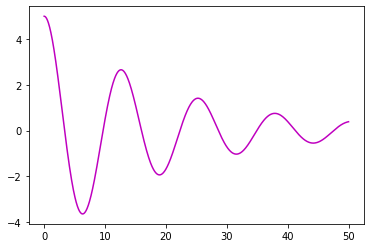

In [54]:
x_sub = sp.lambdify(t, sol_sub.subs([(w, w_num), (x0, x0_num), (x0dot, x0dot_num)]).rhs, 'numpy')

x_sub_plot = x_sub(t_plot)
plt.plot(t_plot, x_sub_plot,color='m')

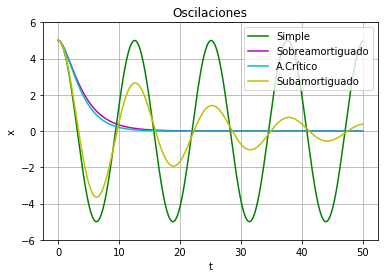

In [69]:
# plt.plot(t_plot,x_sobre_plot,t_plot,x_crit_plot,t_plot,x_sub_plot)
plt.plot(t_plot,x_simple_plot,c='g')
plt.plot(t_plot,x_sobre_plot,c='m')
plt.plot(t_plot,x_crit_plot,c='c')
plt.plot(t_plot,x_sub_plot,c='y')
plt.legend(['Simple','Sobreamortiguado','A.Crítico','Subamortiguado'],loc=1)
plt.grid()
plt.ylim([-6,6])
plt.title('Oscilaciones')
plt.xlabel('t')
plt.ylabel('x')
plt.show()

# Sistema de ecuaciones diferenciales

En una serie radioactiva con dos nucleidos diferentes con concentraciones $N_1(t)$ y $N_2(t)$, se tiene

\begin{align}
\frac{dN_1}{dt} &= -\lambda_1 N_1 \\
\frac{dN_2}{dt} &= -\lambda_1 N_1 - \lambda_2 N_2\\
\end{align}

En $t = 0$, $N_1(0) = N_0$ y $N_2(0) = 0$ 

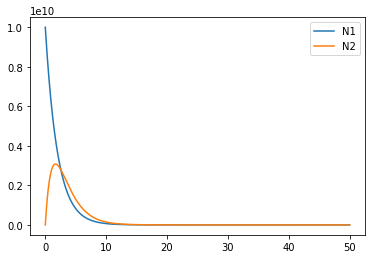

In [78]:
N1= sp.Function('N_1')(t)
N2= sp.Function('N_2')(t)
#l1, l2 = sp.symbols('lambda_1, lambda_2')

l1_num = 0.5
l2_num = 0.7

eq1 = sp.Eq(sp.diff(N1),  -l1_num*N1)
eq2 = sp.Eq(sp.diff(N2),  l1_num*N1 - l2_num*N2)

#Agrupar ecuaciones en una lista
eqs = [eq1, eq2]

sol_sist = sp.dsolve(eqs, [N1, N2], ics = {N1.subs(t, 0): N_0, N2.subs(t, 0): 0})
N1_sol, N2_sol = sol_sist

N1_num = sp.lambdify(t, N1_sol.subs(N_0, N0_num).rhs, 'numpy')
N2_num = sp.lambdify(t, N2_sol.subs(N_0, N0_num).rhs, 'numpy')

N1_plot = N1_num(t_plot)   
N2_plot = N2_num(t_plot)

plt.plot(t_plot, N1_plot, t_plot, N2_plot)
plt.legend(['N1', 'N2'])